# Трофимов Михаил ПМ23-1

In [1]:
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns

**С помощью массивов numpy создайте таблицу умножения.**

In [2]:
a = np.arange(1, 11)
b = np.arange(1, 11).reshape(10,1)
a*b

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

**Создайте функцию, которая принимает как аргументы целое число N и первый элемент (вещественное число), и разность (вещественное число) и создает матрицу numpy по диагонали, которой располагаются первые N членов арифметической прогрессии.**

In [3]:
def diag_arprog(N, first_el, dif):
    return np.diag(np.arange(first_el, first_el + dif*N, dif))

In [4]:
diag_arprog(5, 10, 5)

array([[10,  0,  0,  0,  0],
       [ 0, 15,  0,  0,  0],
       [ 0,  0, 20,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  0, 30]])

**Сгенерируйте средствами numpy матрицу А 5 на 5, содержащую последовательные числа от 1 до 25. Используя срезы извлеките в плоский массив все нечетные элементы этой матрицы.**

In [5]:
A = np.arange(1,26).reshape(5,5)
A

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [6]:
A[A%2 == 1]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25])

In [7]:
A.flatten()[::2]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25])

**Создайте двумерный массив, содержащий единицы на границе и нули внутри.**

In [8]:
def matrix_ones_outside(n):
    A = np.zeros((n,n), 'int32')
    A[:1] = np.ones((1,n), 'int32')
    A[-1:] = np.ones((1,n), 'int32')
    A[:, :1] = np.ones((n,1), 'int32')
    A[:, -1:] = np.ones((n,1), 'int32')
    return A

In [9]:
print(matrix_ones_outside(10))

[[1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1]]


**Создайте две матрицы размером (5,5). Одна матрица содержит 5 в шахматном порядке как в задаче домашнего задания, другая имеет треугольную форму содержащую 5 на основной диагонали и в позициях выше ее, а ниже все 0. Посчитайте их детерминант и найдите обратные матрицы.**

In [10]:
a = np.array([0,5]*12 + [0]).reshape(5,5)
a, np.linalg.det(a)

(array([[0, 5, 0, 5, 0],
        [5, 0, 5, 0, 5],
        [0, 5, 0, 5, 0],
        [5, 0, 5, 0, 5],
        [0, 5, 0, 5, 0]]),
 0.0)

In [11]:
try:
    np.linalg.inv(a)
except:
    print('Вырожденная матрица')

Вырожденная матрица


In [12]:
b = np.triu(np.ones((5,5), 'int32')*5)
b, np.linalg.det(b)

(array([[5, 5, 5, 5, 5],
        [0, 5, 5, 5, 5],
        [0, 0, 5, 5, 5],
        [0, 0, 0, 5, 5],
        [0, 0, 0, 0, 5]], dtype=int32),
 3124.999999999999)

In [13]:
np.linalg.inv(b)

array([[ 0.2, -0.2,  0. ,  0. ,  0. ],
       [ 0. ,  0.2, -0.2,  0. ,  0. ],
       [ 0. ,  0. ,  0.2, -0.2,  0. ],
       [ 0. ,  0. ,  0. ,  0.2, -0.2],
       [ 0. ,  0. ,  0. ,  0. ,  0.2]])

**С помощью pandas загрузите датасет для предсказания цены квартиры, прилагающийся к этой работе.**

In [14]:
table = pd.read_csv('data.csv', index_col = 0)
table

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580


**Выведите на экран несколько первых и несколько последний строк файла.**

In [15]:
table.iloc[:3]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850


In [16]:
table.iloc[-3:]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580
14561,21,1.0,32.330292,22.326870,5.0,3,9.0,1969,0.194489,B,B,47,8004,3,125.0,3,5,B,171842.411855
7202,94,1.0,35.815476,22.301367,6.0,9,9.0,1975,0.127376,B,B,43,8429,3,NaN,3,9,B,177685.627486


**Выведите с помощью методов pandas основные количественные параметры датасета: количество строк и столбцов, тип данных каждого поля, количество значений в каждом столбце, шкала измерения каждого численного поля.**

In [17]:
table.shape

(10000, 19)

In [18]:
table.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [19]:
table.count()

DistrictId       10000
Rooms            10000
Square           10000
LifeSquare        7887
KitchenSquare    10000
Floor            10000
HouseFloor       10000
HouseYear        10000
Ecology_1        10000
Ecology_2        10000
Ecology_3        10000
Social_1         10000
Social_2         10000
Social_3         10000
Healthcare_1      5202
Helthcare_2      10000
Shops_1          10000
Shops_2          10000
Price            10000
dtype: int64

In [20]:
#шкала измерения каждого численного поля?
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 11809 to 7202
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [21]:
table.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


**Удалите из таблицы столбцы, содержащие идентификаторы, переименуйте все оставшиеся названия колонок на русском языке.**

In [22]:
new_table = table[['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', \
                   'Floor', 'HouseFloor', 'HouseYear', 'Price']]
new_table.columns = ['Id Района', 'Число Комнат', 'Общая Площадь', 'ЖилПлощадь', \
                     'Площадь Кухни', 'Этаж Квартиры', 'Этажей в Доме', 'Год Постройки', \
                     'Цена']
new_table

,Id Района,Число Комнат,Общая Площадь,ЖилПлощадь,Площадь Кухни,Этаж Квартиры,Этажей в Доме,Год Постройки,Цена
Id,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,282078.720850
2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,168106.007630
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,343995.102962
...,...,...,...,...,...,...,...,...,...
1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,119367.455796
16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,199715.148807
2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,165953.912580


**Выведите отдельно столбец, содержащий цену, по номеру и названию. Выведите первую, десятую и предпоследнюю строку таблицы по номеру и по индексу.**

In [23]:
new_table['Цена'], '-----------------------------', new_table[new_table.columns[8]]
#По номеру как?

(Id
 11809    305018.871089
 3013     177734.553407
 8215     282078.720850
 2352     168106.007630
 13866    343995.102962
              ...      
 1260     119367.455796
 16265    199715.148807
 2795     165953.912580
 14561    171842.411855
 7202     177685.627486
 Name: Цена, Length: 10000, dtype: float64,
 '-----------------------------',
 Id
 11809    305018.871089
 3013     177734.553407
 8215     282078.720850
 2352     168106.007630
 13866    343995.102962
              ...      
 1260     119367.455796
 16265    199715.148807
 2795     165953.912580
 14561    171842.411855
 7202     177685.627486
 Name: Цена, Length: 10000, dtype: float64)

In [24]:
new_table.loc[11809], '-----------------------------', new_table.iloc[0]

(Id Района            27.000000
 Число Комнат          3.000000
 Общая Площадь       115.027311
 ЖилПлощадь                 NaN
 Площадь Кухни        10.000000
 Этаж Квартиры         4.000000
 Этажей в Доме        10.000000
 Год Постройки      2014.000000
 Цена             305018.871089
 Name: 11809, dtype: float64,
 '-----------------------------',
 Id Района            27.000000
 Число Комнат          3.000000
 Общая Площадь       115.027311
 ЖилПлощадь                 NaN
 Площадь Кухни        10.000000
 Этаж Квартиры         4.000000
 Этажей в Доме        10.000000
 Год Постройки      2014.000000
 Цена             305018.871089
 Name: 11809, dtype: float64)

In [25]:
new_table.index[9]

8094

In [26]:
new_table.loc[8094], '-----------------------------', new_table.iloc[9]

(Id Района             6.000000
 Число Комнат          3.000000
 Общая Площадь        79.867477
 ЖилПлощадь           75.085125
 Площадь Кухни         1.000000
 Этаж Квартиры         3.000000
 Этажей в Доме        17.000000
 Год Постройки      2014.000000
 Цена             194756.023945
 Name: 8094, dtype: float64,
 '-----------------------------',
 Id Района             6.000000
 Число Комнат          3.000000
 Общая Площадь        79.867477
 ЖилПлощадь           75.085125
 Площадь Кухни         1.000000
 Этаж Квартиры         3.000000
 Этажей в Доме        17.000000
 Год Постройки      2014.000000
 Цена             194756.023945
 Name: 8094, dtype: float64)

In [27]:
new_table.loc[7202], '-----------------------------', new_table.iloc[-1]

(Id Района            94.000000
 Число Комнат          1.000000
 Общая Площадь        35.815476
 ЖилПлощадь           22.301367
 Площадь Кухни         6.000000
 Этаж Квартиры         9.000000
 Этажей в Доме         9.000000
 Год Постройки      1975.000000
 Цена             177685.627486
 Name: 7202, dtype: float64,
 '-----------------------------',
 Id Района            94.000000
 Число Комнат          1.000000
 Общая Площадь        35.815476
 ЖилПлощадь           22.301367
 Площадь Кухни         6.000000
 Этаж Квартиры         9.000000
 Этажей в Доме         9.000000
 Год Постройки      1975.000000
 Цена             177685.627486
 Name: 7202, dtype: float64)

**Выделите пять последних колонок в отдельную таблицу. Удалите в ней строки, в которых цена ниже среднего. Присоедините эту таблицу к изначальной (выберите самый подходящий тип соединения).**

In [28]:
new_table_2 = table[table.columns[-5:]]
new_table_2

,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,
11809,NaN,0,0,B,305018.871089
3013,1183.0,1,0,B,177734.553407
8215,240.0,3,1,B,282078.720850
2352,NaN,0,1,B,168106.007630
13866,NaN,0,6,B,343995.102962
...,...,...,...,...,...
1260,NaN,1,9,B,119367.455796
16265,NaN,0,0,A,199715.148807
2795,NaN,1,5,B,165953.912580


In [29]:
new_table_2 = new_table_2[new_table_2['Price'] >= mean(new_table_2['Price'])]
new_table_2

,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,
11809,NaN,0,0,B,305018.871089
8215,240.0,3,1,B,282078.720850
13866,NaN,0,6,B,343995.102962
13072,176.0,5,5,B,326174.175191
535,2620.0,0,3,B,512797.373401
...,...,...,...,...,...
7800,NaN,0,1,B,500562.663412
12848,NaN,1,3,B,260456.004692
1103,NaN,1,0,B,381850.701985


In [30]:
table.merge(new_table_2, left_index = True, right_index = True)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,...,Healthcare_1_x,Helthcare_2_x,Shops_1_x,Shops_2_x,Price_x,Healthcare_1_y,Helthcare_2_y,Shops_1_y,Shops_2_y,Price_y
Id,,,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,...,NaN,0,0,B,305018.871089,NaN,0,0,B,305018.871089
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,...,240.0,3,1,B,282078.720850,240.0,3,1,B,282078.720850
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,...,NaN,0,6,B,343995.102962,NaN,0,6,B,343995.102962
13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,...,176.0,5,5,B,326174.175191,176.0,5,5,B,326174.175191
535,2,3.0,74.199049,44.735889,10.0,5,14.0,2008,0.035145,B,...,2620.0,0,3,B,512797.373401,2620.0,0,3,B,512797.373401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7800,46,3.0,105.649530,63.452792,12.0,13,22.0,2014,0.188784,B,...,NaN,0,1,B,500562.663412,NaN,0,1,B,500562.663412
12848,61,3.0,81.103039,49.310278,8.0,4,4.0,1960,0.298205,B,...,NaN,1,3,B,260456.004692,NaN,1,3,B,260456.004692
1103,41,3.0,76.412253,47.703211,10.0,10,17.0,2001,0.175055,B,...,NaN,1,0,B,381850.701985,NaN,1,0,B,381850.701985


**Выведите таблицу, содержащую среднюю цену и количество квартир на каждом этаже из первоначального набора данных.**

In [31]:
table

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580


In [32]:
count_of_flat = table.groupby('HouseFloor').count()['Rooms']
count_of_flat

HouseFloor
0.0       269
1.0       497
2.0        48
3.0       127
4.0       134
5.0      1031
6.0        58
7.0        59
8.0       141
9.0      1389
10.0      135
11.0       28
12.0     1074
13.0       27
14.0      625
15.0      123
16.0      576
17.0     2331
18.0       89
19.0      108
20.0      105
21.0       33
22.0      343
23.0       40
24.0      176
25.0      374
26.0        1
27.0        6
28.0        3
29.0        1
30.0       21
31.0        1
32.0        4
36.0        1
37.0        4
38.0        1
39.0        2
40.0        7
44.0        1
45.0        1
47.0        1
48.0        2
99.0        2
117.0       1
Name: Rooms, dtype: int64

In [33]:
mean_price = table.groupby('HouseFloor').mean()['Price']
mean_price

HouseFloor
0.0      204397.970231
1.0      210420.432070
2.0      194467.463449
3.0      176652.101112
4.0      151286.889742
5.0      198760.094104
6.0      254037.507036
7.0      282340.913443
8.0      310717.333793
9.0      205671.685200
10.0     249284.579609
11.0     255475.395565
12.0     207581.566731
13.0     269808.869597
14.0     228735.010796
15.0     201156.018676
16.0     246401.079977
17.0     200846.238445
18.0     228426.354875
19.0     179433.629840
20.0     235022.735795
21.0     305127.093448
22.0     254145.448416
23.0     326630.692549
24.0     251162.190732
25.0     205644.073077
26.0     244668.613410
27.0     291783.959020
28.0     248459.724788
29.0     131477.022922
30.0     354135.918321
31.0     287326.123905
32.0     175558.742946
36.0     342223.033781
37.0     285613.082870
38.0     269113.584248
39.0     335364.930260
40.0     499438.961487
44.0     117647.461002
45.0     213171.135199
47.0     450706.552655
48.0     295544.012900
99.0     269728.514047


In [34]:
done_table = pd.DataFrame({'count_of_flat': count_of_flat, 'mean_price': mean_price})
done_table

,count_of_flat,mean_price
HouseFloor,,
0.0,269,204397.970231
1.0,497,210420.432070
2.0,48,194467.463449
3.0,127,176652.101112
4.0,134,151286.889742
5.0,1031,198760.094104
6.0,58,254037.507036
7.0,59,282340.913443
8.0,141,310717.333793


**Сохраните получившуюся таблицу в файлы формата csv и xlsx. Прочитайте их и убедитесь, что данные отображаются корректно.**

In [35]:
done_table.to_csv('done-table.csv')

In [36]:
with pd.ExcelWriter('done-table.xlsx') as writer:
    done_table.to_excel(writer)

**Создайте в Excel или другом табличном редакторе таблицу, содержащую несколько численных и текстовых полей. Прочитайте ее в программу при помощи pandas.**

In [37]:
Proba = pd.read_excel('Proba.xlsx')
Proba

,ФИО помещика,Год рождения помещика,Число крестьян во владении,Деревень во владениях
0,Троекуров Пётр Иванович,1803,2135,27
1,Кузнец Павел Михайлович,1842,3244,35
2,Лобанова Елизавета Петровна,1888,1321,12
3,Кулаева Кристина Александровна,1799,327,3
4,Васнецов Игорь Евгеньевич,1789,10576,87


**Дальнейшие задания производите используя изначальную версию датасета. Должны быть подписаны названия графиков, названия осей, указаны значения на осях. Оцениваться будет использование количества различных атрибутов при построении графиков и визуальная красота.**

In [38]:
#Окей
table

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,61,2.0,49.090728,33.272626,6.0,3,12.0,1981,0.300323,B,B,52,10311,6,NaN,1,9,B,119367.455796
16265,27,2.0,64.307684,37.038420,9.0,13,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,199715.148807
2795,178,1.0,29.648057,16.555363,5.0,3,5.0,1958,0.460556,B,B,20,4386,14,NaN,1,5,B,165953.912580


**Постройте круговую диаграмму для признака Rooms, иллюстрирующую количество квартир в процентах в зависимости от количества комнат. Сделайте сектор с наибольшим числом квартир выдвинутым.**

In [39]:
count_of_rooms = table.groupby('Rooms').count()[['Square']]
count_of_rooms.columns = ['']
count_of_rooms

,
Rooms,
0.0,8
1.0,3705
2.0,3880
3.0,2235
4.0,150
5.0,18
6.0,1
10.0,2
19.0,1


In [40]:
COR = pd.DataFrame({'': [3705, 3880, 2235, 10000 - (3705 + 3880 + 2235)]})
COR.index = [1, 2, 3, '0, 4, 5, 6, 10 & 19']
COR

,
1,3705
2,3880
3,2235
"0, 4, 5, 6, 10 & 19",180


Text(0.5, 1.0, 'Количество квартир в процентах в зависимости от количества комнат')

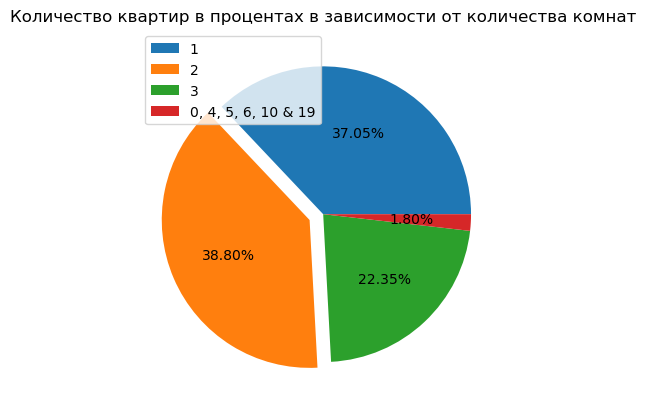

In [41]:
COR.plot.pie(y = '', labels = None, autopct='%1.2f%%', explode = [0, 0.1, 0, 0])
plt.legend(COR.index, loc = 'upper left')
plt.title('Количество квартир в процентах в зависимости от количества комнат')

**Постройте гистограмму по целевой переменной Price. Оцените визуально, по какой цене продаётся наибольшее количество квартир.**

<AxesSubplot:>

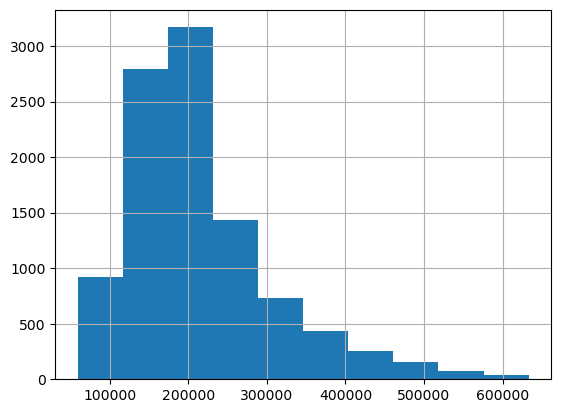

In [42]:
table.Price.hist()

In [43]:
#Больше всего квартир продаётся по цене 200000

**Постройте диаграммы рассеяния для признаков Rooms, Square, HouseFloor, HouseYear в зависимости от целевой переменной Price в одной области figure. Оцените визуально, есть ли среди них такие, на которых разброс точек близок к линейной функции.**

In [44]:
#

**Постройте ядерную оценку плотности целевой переменной Price. Оцените визуально, напоминает ли полученный график нормальное распределение. Постройте двумерную ядерную оценку плотности для целевой переменной Price и признака HouseFloor, затем оцените визуально на каких этажах и по какой цене продаётся основная масса квартир.**

In [45]:
#

**Постройте ящиковую диаграмму признака Square. Оцените визуально имеются ли выбросы, и, если да, то начиная с какого размера площади значение признака можно считать выбросом.**

In [46]:
#

**При помощи сетки графиков PairGrid визуализируйте попарные отношения признаков Rooms, Square, HouseFloor, HouseYear, Price следующим образом: на диагонали - гистограммы, под диагональю - ядерные оценки плотности, над диагональю - диаграммы рассеяния. По результатам визуализации сделайте выводы.**

In [47]:
#

**Постройте тепловую карту матрицы корреляции (df.corr()) признаков Rooms, Square, HouseFloor, HouseYear, Price. По ней определите, какие признаки являются зависимыми (у таких признаков коэффициент корреляции близок к единице).**

<AxesSubplot:>

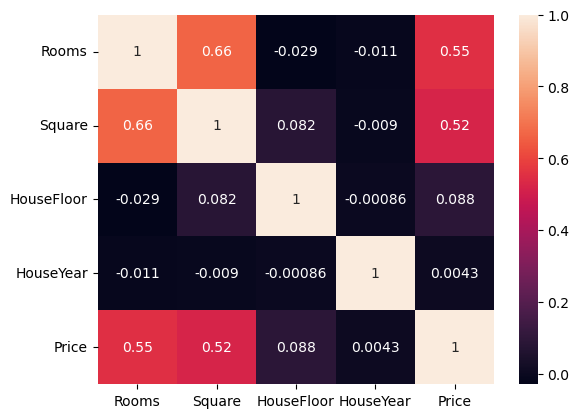

In [48]:
sns.heatmap(table[['Rooms', 'Square', 'HouseFloor', 'HouseYear', 'Price']].corr(), annot = True)

In [49]:
#Зависимых признаков нет